In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- we have two types scalling

- Z-score (standardiztion)

- Min max scalar (Normalization)

In [2]:
path=r'C:\Users\Chaitanya\Documents\Data Files\Visadataset.csv'
visa_df=pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
cat=visa_df.select_dtypes(include='object').columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
num=visa_df.select_dtypes(exclude='object').columns
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [38]:
wage_data=visa_df['prevailing_wage']
wage_mean=wage_data.mean()
wage_std=wage_data.std()
nr=wage_data-wage_mean
z_wage=nr/wage_std
visa_df['z_wage']=z_wage
visa_df['z_wage']

0       -1.398510
1        0.169832
2        0.919060
3        0.169991
4        1.428576
           ...   
25475    0.049923
25476    3.876083
25477    1.360253
25478    0.221504
25479   -0.067762
Name: z_wage, Length: 25480, dtype: float64

In [41]:
visa_df['prevailing_wage','z_wage']

KeyError: ('prevailing_wage', 'z_wage')

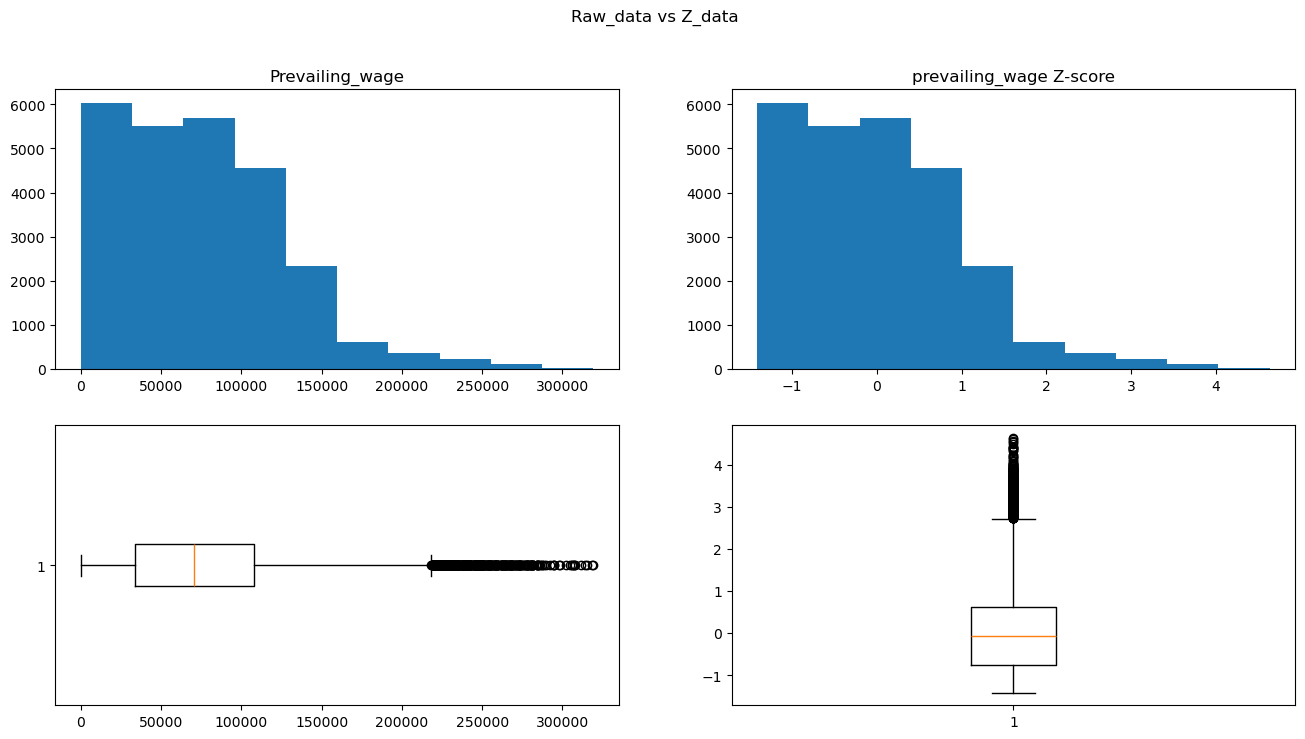

In [14]:
plt.figure(figsize=(16,8))
plt.suptitle('Raw_data vs Z_data')
plt.subplot(2,2,1).hist(wage_data)
plt.title('Prevailing_wage')
plt.subplot(2,2,2).hist(z_wage)
plt.title('prevailing_wage Z-score')
plt.subplot(2,2,3).boxplot(wage_data,vert=False)
plt.subplot(2,2,4).boxplot(z_wage)
plt.show()

**standrdSca;ar**

- sklearn

    - preprocessing

        - StandardScalar

In [15]:
#import method
#save the method
#fi transform
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
wage_ss=ss.fit_transform(visa_df[['prevailing_wage']])
visa_df['wage_ss']=wage_ss

In [16]:
visa_df[['prevailing_wage']]

,prevailing_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25475,77092.5700
25476,279174.7900
25477,146298.8500
25478,86154.7700


In [17]:
visa_df[['prevailing_wage','wage_ss','z_wage']]

,prevailing_wage,wage_ss,z_wage
0,592.2029,-1.398537,-1.398510
1,83425.6500,0.169835,0.169832
2,122996.8600,0.919079,0.919060
3,83434.0300,0.169994,0.169991
4,149907.3900,1.428604,1.428576
...,...,...,...
25475,77092.5700,0.049924,0.049923
25476,279174.7900,3.876159,3.876083
25477,146298.8500,1.360280,1.360253
25478,86154.7700,0.221509,0.221504


In [19]:
visa_df
visa_df['prevailing_wage']
visa_df['prevailing_wage'].values
visa_df['prevailing_wage'].values.reshape(-1,1)

array([[   592.2029],
       [ 83425.65  ],
       [122996.86  ],
       ...,
       [146298.85  ],
       [ 86154.77  ],
       [ 70876.91  ]])

**Min_max Scaller**

In [20]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,z_wage,wage_ss
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510,-1.398537
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832,0.169835
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060,0.919079
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991,0.169994
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576,1.428604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049923,0.049924
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876083,3.876159
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360253,1.360280
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221504,0.221509


In [24]:
wage_min=wage_data.min()

In [25]:
wage_max=wage_data.max()

In [28]:
nr=wage_data-wage_min
nr

0           590.0662
1         83423.5133
2        122994.7233
3         83431.8933
4        149905.2533
            ...     
25475     77090.4333
25476    279172.6533
25477    146296.7133
25478     86152.6333
25479     70874.7733
Name: prevailing_wage, Length: 25480, dtype: float64

In [29]:
dr=wage_max-wage_min
dr

319208.13330000004

In [30]:
nr_dr=nr/dr
nr_dr

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: prevailing_wage, Length: 25480, dtype: float64

In [31]:
visa_df['wage_min_max']=nr_dr
visa_df['wage_min_max']

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: wage_min_max, Length: 25480, dtype: float64

In [32]:
wage_data=visa_df['prevailing_wage']
wage_min=wage_data.min()
wage_max=wage_data.max()
nr=wage_data-wage_min
dr=wage_max-wage_min
nr_dr=nr/dr
visa_df['wage_min_max']=nr_dr
visa_df['wage_min_max']

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: wage_min_max, Length: 25480, dtype: float64

In [36]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
wage_mms=mms.fit_transform(visa_df['prevailing_wage'].values.reshape(-1,1))
visa_df['wage_mms']=wage_mms
visa_df['wage_mms']

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: wage_mms, Length: 25480, dtype: float64

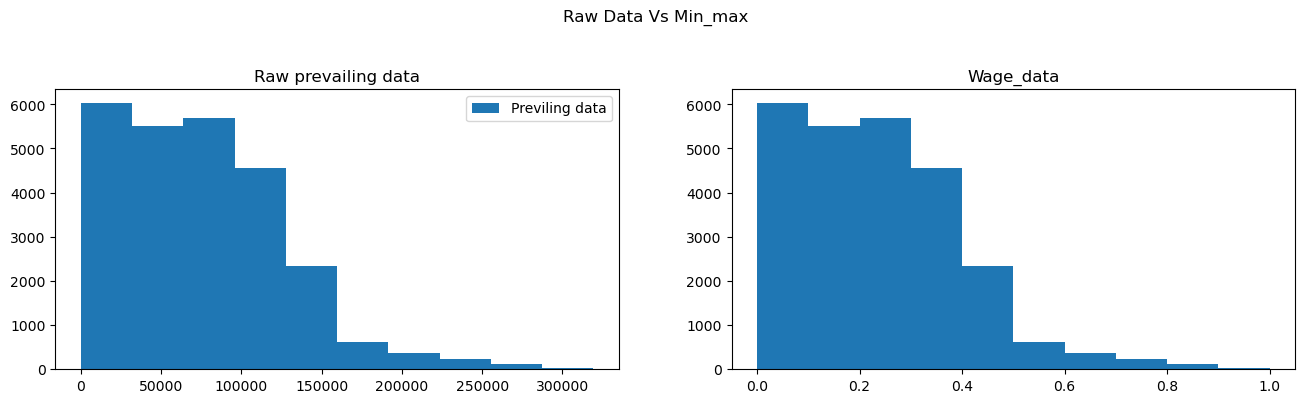

In [54]:
plt.figure(figsize=(16,8))
plt.suptitle('Raw Data Vs Min_max')
plt.legend
plt.subplot(2,2,1).hist(wage_data,label='Previling data')
plt.title('Raw prevailing data')
plt.legend()
plt.subplot(2,2,2).hist(wage_mms,label='Wage mms')
plt.title('Wage_data')
plt.show()